# 시계열 예측 문제
- 사인파형 시계열을 입력으로 다음 스텝의 출력을 예측
- 3개의 순서열을 입력한 후 출력값이 target과 일치하게 만듦

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

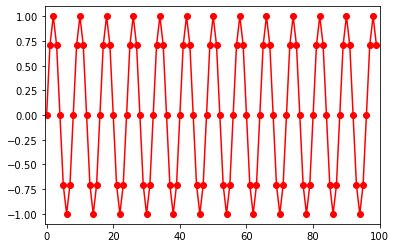

In [28]:
s = np.sin(2 * np.pi * 0.125 * np.arange(100))
plt.plot(s, 'ro-')
plt.xlim(-0.5, 100)
plt.ylim(-1.1, 1.1)
plt.show()

# 원래의 시계열 벡터를 Toeplitz 행렬 형태로 변환
- (대각선 위의 성분들이 같은 정사각 행렬)

In [9]:
from scipy.linalg import toeplitz
S = np.fliplr(toeplitz(np.r_[s[-1], np.zeros(s.shape[0] - 2)], s[::-1]))
S[:20, :3]

array([[ 0.00000000e+00,  7.07106781e-01,  1.00000000e+00],
       [ 7.07106781e-01,  1.00000000e+00,  7.07106781e-01],
       [ 1.00000000e+00,  7.07106781e-01,  1.22464680e-16],
       [ 7.07106781e-01,  1.22464680e-16, -7.07106781e-01],
       [ 1.22464680e-16, -7.07106781e-01, -1.00000000e+00],
       [-7.07106781e-01, -1.00000000e+00, -7.07106781e-01],
       [-1.00000000e+00, -7.07106781e-01, -2.44929360e-16],
       [-7.07106781e-01, -2.44929360e-16,  7.07106781e-01],
       [-2.44929360e-16,  7.07106781e-01,  1.00000000e+00],
       [ 7.07106781e-01,  1.00000000e+00,  7.07106781e-01],
       [ 1.00000000e+00,  7.07106781e-01,  3.67394040e-16],
       [ 7.07106781e-01,  3.67394040e-16, -7.07106781e-01],
       [ 3.67394040e-16, -7.07106781e-01, -1.00000000e+00],
       [-7.07106781e-01, -1.00000000e+00, -7.07106781e-01],
       [-1.00000000e+00, -7.07106781e-01, -4.89858720e-16],
       [-7.07106781e-01, -4.89858720e-16,  7.07106781e-01],
       [-4.89858720e-16,  7.07106781e-01

In [10]:
X_train = S[:-1, :20][:, :, np.newaxis]
Y_train = S[:-1, 20]
X_train.shape, Y_train.shape

((98, 20, 1), (98,))

In [11]:
X_train[:20]

array([[[ 0.00000000e+00],
        [ 7.07106781e-01],
        [ 1.00000000e+00],
        [ 7.07106781e-01],
        [ 1.22464680e-16],
        [-7.07106781e-01],
        [-1.00000000e+00],
        [-7.07106781e-01],
        [-2.44929360e-16],
        [ 7.07106781e-01],
        [ 1.00000000e+00],
        [ 7.07106781e-01],
        [ 3.67394040e-16],
        [-7.07106781e-01],
        [-1.00000000e+00],
        [-7.07106781e-01],
        [-4.89858720e-16],
        [ 7.07106781e-01],
        [ 1.00000000e+00],
        [ 7.07106781e-01]],

       [[ 7.07106781e-01],
        [ 1.00000000e+00],
        [ 7.07106781e-01],
        [ 1.22464680e-16],
        [-7.07106781e-01],
        [-1.00000000e+00],
        [-7.07106781e-01],
        [-2.44929360e-16],
        [ 7.07106781e-01],
        [ 1.00000000e+00],
        [ 7.07106781e-01],
        [ 3.67394040e-16],
        [-7.07106781e-01],
        [-1.00000000e+00],
        [-7.07106781e-01],
        [-4.89858720e-16],
        [ 7.07106781e-01],

In [12]:

Y_train[:20]

array([ 6.12323400e-16, -7.07106781e-01, -1.00000000e+00, -7.07106781e-01,
       -7.34788079e-16,  7.07106781e-01,  1.00000000e+00,  7.07106781e-01,
        8.57252759e-16, -7.07106781e-01, -1.00000000e+00, -7.07106781e-01,
       -9.79717439e-16,  7.07106781e-01,  1.00000000e+00,  7.07106781e-01,
        1.10218212e-15, -7.07106781e-01, -1.00000000e+00, -7.07106781e-01])

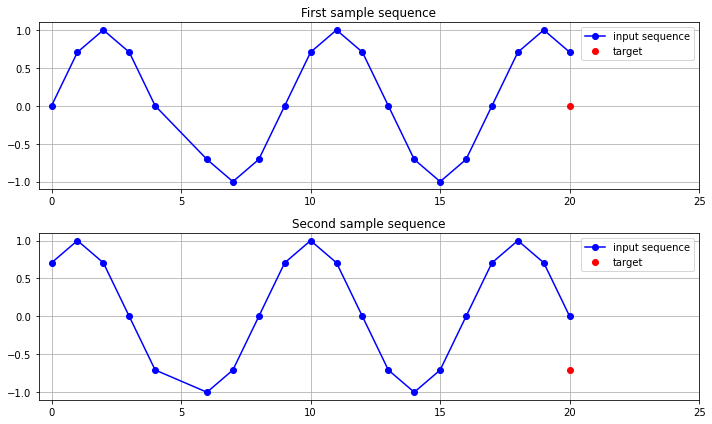

In [34]:

plt.figure(figsize=(10,6))

plt.subplot(211)
plt.plot([0, 1, 2, 3, 4,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20], X_train[0].flatten(), 'bo-', label="input sequence")
plt.plot([20], Y_train[0], 'ro', label="target")
plt.xlim(-0.5, 25)
plt.ylim(-1.1, 1.1)
plt.legend()
plt.grid()
plt.title("First sample sequence")

plt.subplot(212)
plt.plot([0, 1, 2, 3, 4,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20], X_train[1].flatten(), 'bo-', label="input sequence")
plt.plot([20], Y_train[1], 'ro', label="target")
plt.xlim(-0.5, 25)
plt.ylim(-1.1, 1.1)
plt.legend()
plt.grid()
plt.title("Second sample sequence")

plt.tight_layout()
plt.show()

In [35]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense

seed = 2020
np.random.seed(seed)

In [36]:
model = Sequential()
model.add(SimpleRNN(10, input_shape=(20, 1)))
model.add(Dense(1, activation="linear"))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_2 (SimpleRNN)     (None, 10)                120       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 11        
Total params: 131
Trainable params: 131
Non-trainable params: 0
_________________________________________________________________


In [37]:
model.compile(loss='mse', optimizer='sgd')

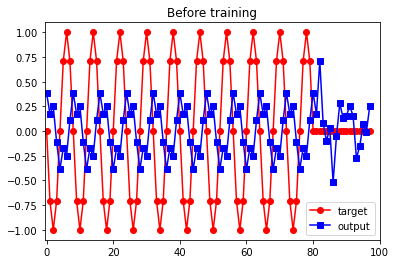

In [40]:
plt.plot(Y_train, 'ro-', label="target")
plt.plot(model.predict(X_train[:, :, :]), 'bs-', label="output")
plt.xlim(-0.5, 100)
plt.ylim(-1.1, 1.1)
plt.legend()
plt.title("Before training")
plt.show()

In [41]:
history = model.fit(X_train, Y_train, epochs=100)

Epoch 1/100
98/98 [==============================] - 0s 1ms/step - loss: 0.5520
Epoch 2/100
98/98 [==============================] - 0s 213us/step - loss: 0.4411
Epoch 3/100
98/98 [==============================] - 0s 177us/step - loss: 0.3574
Epoch 4/100
98/98 [==============================] - 0s 142us/step - loss: 0.2670
Epoch 5/100
98/98 [==============================] - 0s 153us/step - loss: 0.2031
Epoch 6/100
98/98 [==============================] - 0s 142us/step - loss: 0.1671
Epoch 7/100
98/98 [==============================] - 0s 142us/step - loss: 0.1322
Epoch 8/100
98/98 [==============================] - 0s 142us/step - loss: 0.1021
Epoch 9/100
98/98 [==============================] - 0s 132us/step - loss: 0.0845
Epoch 10/100
98/98 [==============================] - 0s 142us/step - loss: 0.0669
Epoch 11/100
98/98 [==============================] - 0s 132us/step - loss: 0.0566
Epoch 12/100
98/98 [==============================] - 0s 142us/step - loss: 0.0480
Epoch 13/100
98

98/98 [==============================] - 0s 122us/step - loss: 0.0071
Epoch 100/100
98/98 [==============================] - 0s 122us/step - loss: 0.0071


# 결과 확인

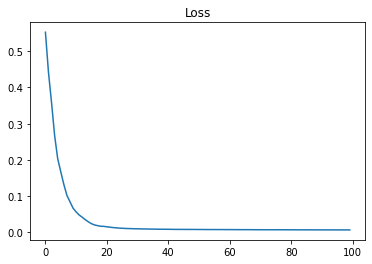

In [42]:

plt.plot(history.history["loss"])
plt.title("Loss")
plt.show()

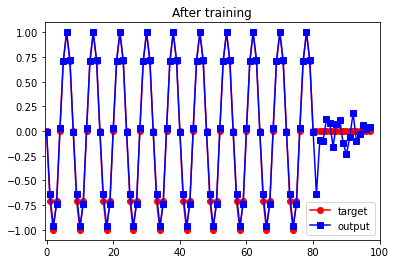

In [43]:
plt.plot(Y_train, 'ro-', label="target")
plt.plot(model.predict(X_train[:, :, :]), 'bs-', label="output")
plt.xlim(-0.5, 100)
plt.ylim(-1.1, 1.1)
plt.legend()
plt.title("After training")
plt.show()

In [44]:
# 입력에 대한 weights
model.weights[0]

<tf.Variable 'simple_rnn_2/kernel:0' shape=(1, 10) dtype=float32, numpy=
array([[-0.4033128 , -0.73880565, -0.32654238, -0.17679635,  0.52010125,
        -0.75413096,  0.45427504, -0.4979846 , -0.67720187,  0.10879677]],
      dtype=float32)>

In [45]:
# 유닛에 대한 weights
model.weights[1]

<tf.Variable 'simple_rnn_2/recurrent_kernel:0' shape=(10, 10) dtype=float32, numpy=
array([[-0.27318788, -0.01804462, -0.46377036, -0.04622211,  0.2687514 ,
        -0.4939155 , -0.2709253 ,  0.04630024,  0.2008442 , -0.31994727],
       [ 0.4417068 , -0.14910415, -0.43845597,  0.10080343,  0.0758244 ,
         0.60377425, -0.12867719, -0.08873339, -0.22723174, -0.21499705],
       [-0.21148007, -0.15177064,  0.3710921 ,  0.26152375, -0.08516417,
         0.27406916,  0.14416361,  0.04836286,  0.40816307, -0.66707873],
       [-0.08015673,  0.47218806, -0.05806759, -0.19147785, -0.23566176,
         0.30607465, -0.5824632 ,  0.28334215,  0.30209646,  0.0703543 ],
       [-0.1659369 , -0.25385714, -0.17119925,  0.5268592 ,  0.0525421 ,
         0.08317054, -0.11214205, -0.30914366,  0.39282194,  0.3776087 ],
       [ 0.1169764 ,  0.01471051,  0.44391963,  0.2601497 ,  0.6334305 ,
        -0.05340226, -0.32595235,  0.3500221 , -0.17952898, -0.01131691],
       [ 0.32591468,  0.38042387, 

In [46]:

# bias
model.weights[2]

<tf.Variable 'simple_rnn_2/bias:0' shape=(10,) dtype=float32, numpy=
array([-0.00028947, -0.0103764 , -0.00105035, -0.01890401, -0.01070226,
       -0.0151613 ,  0.00818158, -0.006001  , -0.00599993, -0.00315242],
      dtype=float32)>